# <b><span style='color:#F1A424'>AutoML - Multi-Class Classification - Iris Flower Type Prediction  </span> </b>

### Disclaimer
Please note, the Vantage Functions via SQLAlchemy feature is a preview/beta code release with limited functionality (the “Code”). As such, you acknowledge that the Code is experimental in nature and that the Code is provided “AS IS” and may not be functional on any machine or in any environment. TERADATA DISCLAIMS ALL WARRANTIES RELATING TO THE CODE, EXPRESS OR IMPLIED, INCLUDING, BUT NOT LIMITED TO, ANY WARRANTIES AGAINST INFRINGEMENT OF THIRD-PARTY RIGHTS, MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE.

TERADATA SHALL NOT BE RESPONSIBLE OR LIABLE WITH RESPECT TO ANY SUBJECT MATTER OF THE CODE UNDER ANY CONTRACT, NEGLIGENCE, STRICT LIABILITY OR OTHER THEORY 
    (A) FOR LOSS OR INACCURACY OF DATA OR COST OF PROCUREMENT OF SUBSTITUTE GOODS, SERVICES OR TECHNOLOGY, OR 
    (B) FOR ANY INDIRECT, INCIDENTAL OR CONSEQUENTIAL DAMAGES INCLUDING, BUT NOT LIMITED TO LOSS OF REVENUES AND LOSS OF PROFITS. TERADATA SHALL NOT BE RESPONSIBLE FOR ANY MATTER BEYOND ITS REASONABLE CONTROL.

Notwithstanding anything to the contrary: 
    (a) Teradata will have no obligation of any kind with respect to any Code-related comments, suggestions, design changes or improvements that you elect to provide to Teradata in either verbal or written form (collectively, “Feedback”), and 
    (b) Teradata and its affiliates are hereby free to use any ideas, concepts, know-how or techniques, in whole or in part, contained in Feedback: 
        (i) for any purpose whatsoever, including developing, manufacturing, and/or marketing products and/or services incorporating Feedback in whole or in part, and 
        (ii) without any restrictions or limitations, including requiring the payment of any license fees, royalties, or other consideration. 

## <b> Problem overview:</b>
    


The Iris dataset is a classic dataset in the field of machine learning and statistics.It contains measurements of various features of iris flowers, making it a quintessential dataset for practicing classification algorithms and statistical analysis.

Here are some key details about the Iris dataset:

**Features**:

- `Sepal Length (cm)`: Measurement of the length of the outermost petal parts (sepals).
- `Sepal Width (cm)`: Measurement of the width of the sepals.
- `Petal Length (cm)`: Measurement of the length of the innermost petal parts (petals).
- `Petal Width (cm)`: Measurement of the width of the petals.

**Target Variable**:

- `Species`: The species of iris flowers. It includes three classes: `Setosa`, `Versicolor` and `Virginica`.

        
**Objective**:

The primary objective is typically to build a model that can accurately classify iris flowers into one of the three species based on the provided features.

**Challenges**:

- The dataset consists of 150 instances, with 50 instances for each of the three classes.

**Usecase**:
Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in custom run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

As part of custom AutoML run, we will customize below functionalities:
- Train test split with training size 0.85.
- Data imbalance handling with 'SMOTE' method.
- Feature scaling with 'range' method.
- Addition of customized value in hyperparameter 'max_depth' for 'xgboost' model.

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoClassifier

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data("teradataml", "iris_input")

In [5]:
# Fetching in teradata dataframe
iris = DataFrame.from_table("iris_input")

In [6]:
# first 5 rows
iris.head()

id,sepal_length,sepal_width,petal_length,petal_width,species
3,4.7,3.2,1.3,0.2,1
5,5.0,3.6,1.4,0.2,1
6,5.4,3.9,1.7,0.4,1
7,4.6,3.4,1.4,0.3,1
9,4.4,2.9,1.4,0.2,1
10,4.9,3.1,1.5,0.1,1
8,5.0,3.4,1.5,0.2,1
4,4.6,3.1,1.5,0.2,1
2,4.9,3.0,1.4,0.2,1
1,5.1,3.5,1.4,0.2,1


In [7]:
# Performing sampling to get 80% for trainning and 20% for testing
iris_sample = iris.sample(frac = [0.8, 0.2])

In [8]:
iris_sample.head()

id,sepal_length,sepal_width,petal_length,petal_width,species,sampleid
3,4.7,3.2,1.3,0.2,1,1
5,5.0,3.6,1.4,0.2,1,1
6,5.4,3.9,1.7,0.4,1,1
7,4.6,3.4,1.4,0.3,1,1
9,4.4,2.9,1.4,0.2,1,2
10,4.9,3.1,1.5,0.1,1,1
8,5.0,3.4,1.5,0.2,1,1
4,4.6,3.1,1.5,0.2,1,1
2,4.9,3.0,1.4,0.2,1,1
1,5.1,3.5,1.4,0.2,1,1


In [9]:
# Fetching train and test data
iris_train= iris_sample[iris_sample['sampleid'] == 1].drop('sampleid', axis=1)
iris_test = iris_sample[iris_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [10]:
# train data shape
iris_train.shape

(120, 6)

In [11]:
# test data shape
iris_test.shape

(30, 6)

In [12]:
#train dataset
iris_train.head()

id,sepal_length,sepal_width,petal_length,petal_width,species
3,4.7,3.2,1.3,0.2,1
5,5.0,3.6,1.4,0.2,1
6,5.4,3.9,1.7,0.4,1
7,4.6,3.4,1.4,0.3,1
10,4.9,3.1,1.5,0.1,1
11,5.4,3.7,1.5,0.2,1
8,5.0,3.4,1.5,0.2,1
4,4.6,3.1,1.5,0.2,1
2,4.9,3.0,1.4,0.2,1
1,5.1,3.5,1.4,0.2,1


In [13]:
# test dataset
iris_test.head()

id,sepal_length,sepal_width,petal_length,petal_width,species
21,5.4,3.4,1.7,0.2,1
38,4.9,3.6,1.4,0.1,1
45,5.1,3.8,1.9,0.4,1
47,5.1,3.8,1.6,0.2,1
54,5.5,2.3,4.0,1.3,2
55,6.5,2.8,4.6,1.5,2
52,6.4,3.2,4.5,1.5,2
24,5.1,3.3,1.7,0.5,1
20,5.1,3.8,1.5,0.3,1
9,4.4,2.9,1.4,0.2,1


In [14]:
iris_test.head(30)

id,sepal_length,sepal_width,petal_length,petal_width,species
21,5.4,3.4,1.7,0.2,1
38,4.9,3.6,1.4,0.1,1
45,5.1,3.8,1.9,0.4,1
47,5.1,3.8,1.6,0.2,1
54,5.5,2.3,4.0,1.3,2
55,6.5,2.8,4.6,1.5,2
66,6.7,3.1,4.4,1.4,2
67,5.6,3.0,4.5,1.5,2
68,5.8,2.7,4.1,1.0,2
69,6.2,2.2,4.5,1.5,2


In [16]:
AutoClassifier.generate_custom_config("custom_iris")


Generating custom config JSON for AutoML ...

Available main options for customization with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Feature Engineering Phase

Index 2: Customize Data Preparation Phase

Index 3: Customize Model Training Phase

Index 4: Generate custom json and exit
--------------------------------------------------------------------------------

Enter the index you want to customize:  2

Customizing Data Preparation Phase ...

Available options for customization of data preparation phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Train Test Split

Index 2: Customize Data Imbalance Handling

Index 3: Customize Outlier Handling

Index 4: Customize Feature Scaling

Index 5: Back to main menu

Index 6: Generate custom json and exit
-------------------------------------------------------------------------

## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [15]:
# Creating AutoClassifier instance
# Including xgboost model from default model list for training.
# Using early stopping timer criteria with value 100 sec.
# Passing custom json file to provide customized value for AutoML.

aml = AutoClassifier(include=['xgboost'],
                     verbose=2,
                     max_runtime_secs=100,
                     custom_config_file='custom_iris.json')


Received below input for customization : 
{
    "TrainTestSplitIndicator": true,
    "TrainingSize": 0.85,
    "DataImbalanceIndicator": true,
    "DataImbalanceMethod": "SMOTE",
    "FeatureScalingIndicator": true,
    "FeatureScalingMethod": "range",
    "HyperparameterTuningIndicator": true,
    "HyperparameterTuningParam": {
        "xgboost": {
            "max_depth": {
                "Method": "ADD",
                "Value": [
                    3,
                    4
                ]
            }
        }
    }
}


Feature Exploration started ...

Data Overview:
Total Rows in the data: 120
Total Columns in the data: 6

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
species,INTEGER,120,0,None,0,120,0,0.0,100.0
id,INTEGER,120,0,None,0,120,0,0.0,100.0
petal_length,FLOAT,120,0,None,0,120,0,0.0,100.0
petal_width,FLOAT,120,0,None,0,120,0,0.0,100.0
sepal_width,FLOAT,120,0,None,0,120,0,0.0,100.0
sepal_length,FLOAT,120,0,None,0,120,0,0.0,100.0



Statistics of Data:


func,id,sepal_length,sepal_width,petal_length,petal_width,species
50%,75.5,5.7,3,4.2,1.3,2
count,120,120,120,120,120,120
mean,74.425,5.813,3.066,3.679,1.169,1.975
min,1,4.3,2,1,0.1,1
max,150,7.9,4.4,6.9,2.5,3
75%,113.25,6.4,3.4,5.1,1.8,3
25%,34.75,5.1,2.8,1.5,0.275,1
std,44.617,0.838,0.434,1.814,0.78,0.835



Target Column Distribution:


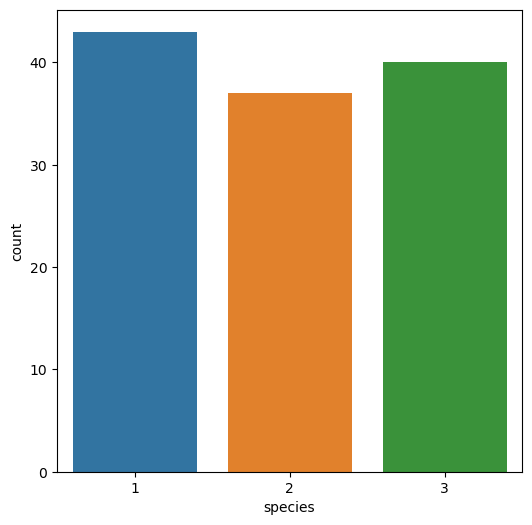

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
    ColumnName  OutlierPercentage
0  sepal_width           0.833333


Analysis completed. No action taken.                                                    


Analysis Completed. Dataset does not contain any feature related to dates. No action needed.


Proceeding with default option for missing value imputation.                             
Proceeding with default option for handling remaining missing values.                    


Analysis Completed. No Missing Values Detected.                                          


Analysis completed. No imputation required.                                              


No information provided for Variable-Width Transformation.                               
Skipping customized string manipulation.⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾｜ 26% - 5/19


AutoML will proceed with default encoding technique.                                     


Analysis completed. No categorical columns were found.                                   


Skipping customized mathematical transformation.                                         


Skipping customized non-linear transformation.                                           


Skipping customized anti-select columns.                                                 


Training size : 0.85                                                                      
Testing size  : 0.15                                                                      


sepal_length,sepal_width,petal_length,petal_width,species,id
5.0,2.0,3.5,1.0,2,14
6.3,3.3,6.0,2.5,3,9
5.4,3.9,1.3,0.4,1,17
6.6,3.0,4.4,1.4,2,8
5.1,3.4,1.5,0.2,1,10
6.0,2.2,5.0,1.5,3,18
5.1,2.5,3.0,1.1,2,13
5.6,2.7,4.2,1.3,2,21
5.6,2.8,4.9,2.0,3,11
5.7,3.8,1.7,0.3,1,19


sepal_length,sepal_width,petal_length,petal_width,species,id
5.7,2.5,5.0,2.0,3,28
5.8,4.0,1.2,0.2,1,31
6.0,2.9,4.5,1.5,2,103
5.3,3.7,1.5,0.2,1,29
6.6,2.9,4.6,1.3,2,27
6.9,3.1,5.4,2.1,3,99
5.0,3.2,1.2,0.2,1,30
5.6,2.9,3.6,1.3,2,102
6.5,3.0,5.5,1.8,3,53
6.1,3.0,4.6,1.4,2,76


No information provided for customized outlier processing. AutoML will proceed with default settings.


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
    ColumnName  OutlierPercentage
0  sepal_width           0.833333


['sepal_width']
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719271084415332"' - 11/19


sepal_length,sepal_width,petal_length,petal_width,species,id
7.2,3.0,5.8,1.6,3,112
6.1,2.9,4.7,1.4,2,65
6.1,2.6,5.6,1.4,3,20
4.5,2.3,1.3,0.3,1,126
5.4,3.4,1.5,0.4,1,39
6.2,2.8,4.8,1.8,3,58
6.2,3.4,5.4,2.3,3,122
6.7,2.5,5.8,1.8,3,100
6.7,3.0,5.0,1.7,2,15
7.3,2.9,6.3,1.8,3,63


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719264618371555"' - 12/19
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719265925891621"'


['sepal_length', 'sepal_width', 'petal_width', 'petal_length']


['sepal_length', 'sepal_width', 'petal_width', 'petal_length']


id,species,sepal_length,sepal_width,petal_width,petal_length
10,1,0.2121212121212119,0.6363636363636362,0.04166666666666667,0.0847457627118644
12,2,0.3939393939393939,0.27272727272727276,0.375,0.423728813559322
13,2,0.2121212121212119,0.22727272727272727,0.4166666666666667,0.3389830508474576
14,2,0.1818181818181817,0.0,0.375,0.423728813559322
16,1,0.1818181818181817,0.45454545454545453,0.04166666666666667,0.1016949152542373
17,1,0.30303030303030304,0.8636363636363635,0.12500000000000003,0.05084745762711865
15,2,0.6969696969696969,0.45454545454545453,0.6666666666666666,0.6779661016949152
11,3,0.3636363636363634,0.36363636363636354,0.7916666666666666,0.6610169491525424
9,3,0.5757575757575756,0.5909090909090908,1.0,0.847457627118644
8,2,0.6666666666666665,0.45454545454545453,0.5416666666666666,0.576271186440678


id,species,sepal_length,sepal_width,petal_width,petal_length
130,1,0.06060606060606039,0.5,0.04166666666666667,0.0847457627118644
30,1,0.1818181818181817,0.5454545454545455,0.04166666666666667,0.033898305084745756
134,3,0.818181818181818,0.45454545454545453,0.8333333333333334,0.8305084745762712
29,1,0.2727272727272726,0.7727272727272727,0.04166666666666667,0.0847457627118644
107,1,-0.030303030303030467,0.45454545454545453,0.0,0.016949152542372895
99,3,0.7575757575757576,0.5,0.8333333333333334,0.7457627118644068
53,3,0.6363636363636362,0.45454545454545453,0.7083333333333334,0.7627118644067796
118,3,0.5757575757575756,0.31818181818181823,0.7083333333333334,0.6610169491525424
127,3,1.0606060606060606,0.818181818181818,0.7916666666666666,0.9152542372881356
31,1,0.4242424242424241,0.9090909090909091,0.04166666666666667,0.033898305084745756


['petal_length', 'petal_width']


['r_petal_length', 'r_petal_width']


id,species,r_petal_length,r_petal_width
10,1,0.0847457627118644,0.04166666666666667
12,2,0.423728813559322,0.375
13,2,0.3389830508474576,0.4166666666666667
14,2,0.423728813559322,0.375
16,1,0.1016949152542373,0.04166666666666667
17,1,0.05084745762711865,0.12500000000000003
15,2,0.6779661016949152,0.6666666666666666
11,3,0.6610169491525424,0.7916666666666666
9,3,0.847457627118644,1.0
8,2,0.576271186440678,0.5416666666666666


id,species,r_petal_length,r_petal_width
130,1,0.0847457627118644,0.04166666666666667
30,1,0.033898305084745756,0.04166666666666667
134,3,0.8305084745762712,0.8333333333333334
29,1,0.0847457627118644,0.04166666666666667
107,1,0.016949152542372895,0.0
99,3,0.7457627118644068,0.8333333333333334
53,3,0.7627118644067796,0.7083333333333334
118,3,0.6610169491525424,0.7083333333333334
127,3,0.9152542372881356,0.7916666666666666
31,1,0.033898305084745756,0.04166666666666667


['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


species,id,sepal_length,sepal_width,petal_length,petal_width
1,126,0.030303030303030196,0.13636363636363627,0.05084745762711865,0.08333333333333333
1,39,0.30303030303030304,0.6363636363636362,0.0847457627118644,0.12500000000000003
3,79,0.5757575757575756,0.409090909090909,0.7796610169491525,0.7083333333333334
3,9,0.5757575757575756,0.5909090909090908,0.847457627118644,1.0
3,34,0.8484848484848485,0.7272727272727273,0.8644067796610169,1.0
2,65,0.5151515151515149,0.409090909090909,0.6271186440677966,0.5416666666666666
3,20,0.5151515151515149,0.27272727272727276,0.7796610169491525,0.5416666666666666
3,100,0.6969696969696969,0.22727272727272727,0.8135593220338982,0.7083333333333334
2,15,0.6969696969696969,0.45454545454545453,0.6779661016949152,0.6666666666666666
3,58,0.5454545454545454,0.36363636363636354,0.6440677966101694,0.7083333333333334


species,id,sepal_length,sepal_width,petal_length,petal_width
1,31,0.4242424242424241,0.9090909090909091,0.033898305084745756,0.04166666666666667
2,26,0.5757575757575756,0.5909090909090908,0.6271186440677966,0.625
1,130,0.06060606060606039,0.5,0.0847457627118644,0.04166666666666667
1,30,0.1818181818181817,0.5454545454545455,0.033898305084745756,0.04166666666666667
1,29,0.2727272727272726,0.7727272727272727,0.0847457627118644,0.04166666666666667
3,53,0.6363636363636362,0.45454545454545453,0.7627118644067796,0.7083333333333334
3,28,0.3939393939393939,0.22727272727272727,0.6779661016949152,0.7916666666666666
2,76,0.5151515151515149,0.45454545454545453,0.6101694915254237,0.5416666666666666
2,102,0.3636363636363634,0.409090909090909,0.4406779661016949,0.5
2,103,0.48484848484848475,0.409090909090909,0.5932203389830508,0.5833333333333334


['col_0', 'col_1']


                                                                                          
Completed customized hyperparameter update.


response_column : species                                                                                                                             
name : xgboost
model_type : Classification
column_sampling : (1, 0.6)
min_impurity : (0.0, 0.1)
lambda1 : (0.01, 0.1, 1, 10)
shrinkage_factor : (0.5, 0.1, 0.2)
max_depth : (3, 4, 5, 6, 7, 8)
min_node_size : (1, 2)
iter_num : (10, 20)
seed : 42
Total number of models for xgboost : 1152
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719269171316747"'                                                                                                                      
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719273333477689"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719266440814113"'


,Rank,Model-ID,Feature-Selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,XGBOOST_3,lasso,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2,XGBOOST_2,pca,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,3,XGBOOST_0,lasso,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,4,XGBOOST_4,rfe,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [16]:
# Fitting train data
aml.fit(iris_train, iris_train.species)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [17]:
# Fetching Leaderboard
aml.leaderboard()

,Rank,Model-ID,Feature-Selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,XGBOOST_3,lasso,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2,XGBOOST_2,pca,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,3,XGBOOST_0,lasso,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,4,XGBOOST_4,rfe,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [18]:
# Fetching best performing model for dataset
aml.leader()

,Rank,Model-ID,Feature-Selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,XGBOOST_3,lasso,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## <b><span style='color:#F1A424'>| 5.</span> Generating Prediction : </b>

In [21]:
# Generating prediction and metrics on test data
prediction = aml.predict(iris_test)

Data Transformation started ...


sepal_length,sepal_width,petal_length,petal_width,species
4.9,3.6,1.4,0.1,1
6.9,3.2,5.7,2.3,3
5.5,2.3,4.0,1.3,2
5.1,3.8,1.6,0.2,1
6.0,3.0,4.8,1.8,3
5.1,3.3,1.7,0.5,1
6.4,2.7,5.3,1.9,3
5.9,3.2,4.8,1.8,2
6.4,3.2,4.5,1.5,2
4.9,2.5,4.5,1.7,3


id,petal_width,sepal_length,petal_length,sepal_width,species
11,0.2,5.1,1.6,3.8,1
10,1.5,6.4,4.5,3.2,2
18,1.7,4.9,4.5,2.5,3
9,0.2,4.4,1.4,2.9,1
13,1.9,6.4,5.3,2.7,3
21,1.8,5.9,4.8,3.2,2
15,1.8,6.0,4.8,3.0,3
23,0.5,5.1,1.7,3.3,1
14,2.3,6.9,5.7,3.2,3
22,1.3,5.5,4.0,2.3,2


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719265181336355"'⫾⫾⫾｜ 73% - 11/15


id,sepal_length,sepal_width,petal_width,petal_length,species
17,5.8,2.7,1.0,4.1,2
36,6.7,3.1,1.4,4.4,2
28,6.5,2.8,1.5,4.6,2
22,5.5,2.3,1.3,4.0,2
19,5.1,3.8,0.4,1.9,1
30,6.3,2.8,1.5,5.1,3
15,6.0,3.0,1.8,4.8,3
32,6.2,2.9,1.3,4.3,2
38,5.5,2.5,1.3,4.0,2
12,4.9,3.6,0.1,1.4,1


id,species,sepal_length,sepal_width,petal_width,petal_length
26,3,0.6363636363636362,0.45454545454545453,0.8750000000000001,0.8135593220338982
19,1,0.2121212121212119,0.818181818181818,0.12500000000000003,0.15254237288135591
30,3,0.5757575757575756,0.36363636363636354,0.5833333333333334,0.6949152542372881
38,2,0.33333333333333326,0.22727272727272727,0.5,0.5084745762711864
15,3,0.48484848484848475,0.45454545454545453,0.7083333333333334,0.6440677966101694
32,2,0.5454545454545454,0.409090909090909,0.5,0.559322033898305
36,2,0.6969696969696969,0.5,0.5416666666666666,0.576271186440678
28,2,0.6363636363636362,0.36363636363636354,0.5833333333333334,0.6101694915254237
22,2,0.33333333333333326,0.13636363636363627,0.5,0.5084745762711864
35,1,0.30303030303030304,0.6363636363636362,0.04166666666666667,0.11864406779661016


id,petal_length,petal_width,species
19,1.9,0.4,1
36,4.4,1.4,2
28,4.6,1.5,2
15,4.8,1.8,3
22,4.0,1.3,2
35,1.7,0.2,1
26,5.8,2.2,3
20,6.7,2.2,3
17,4.1,1.0,2
34,3.7,1.0,2


id,species,r_petal_length,r_petal_width
17,2,0.5254237288135593,0.375
38,2,0.5084745762711864,0.5
12,1,0.06779661016949151,0.0
26,3,0.8135593220338982,0.8750000000000001
22,2,0.5084745762711864,0.5
35,1,0.11864406779661016,0.04166666666666667
36,2,0.576271186440678,0.5416666666666666
28,2,0.6101694915254237,0.5833333333333334
15,3,0.6440677966101694,0.7083333333333334
32,2,0.559322033898305,0.5


id,species,sepal_length,sepal_width,petal_length,petal_width
38,2,0.33333333333333326,0.22727272727272727,0.5084745762711864,0.5
17,2,0.4242424242424241,0.31818181818181823,0.5254237288135593,0.375
34,2,0.33333333333333326,0.18181818181818177,0.4576271186440678,0.375
36,2,0.6969696969696969,0.5,0.576271186440678,0.5416666666666666
26,3,0.6363636363636362,0.45454545454545453,0.8135593220338982,0.8750000000000001
20,3,1.0,0.818181818181818,0.9661016949152542,0.8750000000000001
15,3,0.48484848484848475,0.45454545454545453,0.6440677966101694,0.7083333333333334
32,2,0.5454545454545454,0.409090909090909,0.559322033898305,0.5
19,1,0.2121212121212119,0.818181818181818,0.15254237288135591,0.12500000000000003
30,3,0.5757575757575756,0.36363636363636354,0.6949152542372881,0.5833333333333334


,id,col_0,col_1,species
0,26,0.587605,-0.047159,3
1,17,0.022157,0.151640,2
2,22,0.080254,0.350050,2
3,19,-0.539854,-0.241541,1
4,38,0.065359,0.267180,2
5,36,0.251901,-0.123876,2
6,15,0.310856,0.004679,3
7,20,0.784031,-0.513725,3
8,34,-0.037448,0.307457,2
9,35,-0.542639,-0.113247,1


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 15/15            

Following model is being used for generating prediction :
Model ID : XGBOOST_3 
Feature Selection Method : lasso

Prediction : 
   id  Prediction  Confidence_Lower  Confidence_upper  species
0  19           1               1.0               1.0        1
1  26           3               1.0               1.0        3
2  20           3               1.0               1.0        3
3  36           2               1.0               1.0        2
4  38           2               1.0               1.0        2
5  12           1               1.0               1.0        1
6  17           2               1.0               1.0        2
7  34           2               1.0               1.0        2
8  15           3               1.0               1.0        3
9  32           2               1.0               1.0        2

Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  CLASS_3  

array([[ 7,  0,  0],
       [ 0, 12,  1],
       [ 0,  1,  9]], dtype=int64)

In [22]:
# Printing prediction
prediction.head()

id,Prediction,Confidence_Lower,Confidence_upper,species
10,2,1.0,1.0,2
12,1,1.0,1.0,1
13,3,1.0,1.0,3
14,3,1.0,1.0,3
16,3,1.0,1.0,3
17,2,1.0,1.0,2
15,3,1.0,1.0,3
11,1,1.0,1.0,1
9,1,1.0,1.0,1
8,2,1.0,1.0,2


In [23]:
# Generating prediction and metrics on test data
prediction = aml.predict(iris_test,2)

Data Transformation started ...


sepal_length,sepal_width,petal_length,petal_width,species
6.4,2.7,5.3,1.9,3
6.4,3.2,4.5,1.5,2
4.9,2.5,4.5,1.7,3
6.9,3.2,5.7,2.3,3
6.0,3.0,4.8,1.8,3
5.1,3.3,1.7,0.5,1
5.1,3.8,1.6,0.2,1
5.1,3.8,1.9,0.4,1
4.9,3.6,1.4,0.1,1
7.7,3.8,6.7,2.2,3


id,petal_width,sepal_length,petal_length,sepal_width,species
9,0.2,4.4,1.4,2.9,1
13,1.9,6.4,5.3,2.7,3
21,1.8,5.9,4.8,3.2,2
12,0.1,4.9,1.4,3.6,1
14,2.3,6.9,5.7,3.2,3
22,1.3,5.5,4.0,2.3,2
15,1.8,6.0,4.8,3.0,3
23,0.5,5.1,1.7,3.3,1
8,1.2,5.8,4.0,2.6,2
16,1.9,7.4,6.1,2.8,3


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719265053408686"'⫾⫾⫾｜ 73% - 11/15


id,sepal_length,sepal_width,petal_width,petal_length,species
22,5.5,2.3,1.3,4.0,2
26,6.5,3.0,2.2,5.8,3
20,7.7,3.8,2.2,6.7,3
19,5.1,3.8,0.4,1.9,1
36,6.7,3.1,1.4,4.4,2
28,6.5,2.8,1.5,4.6,2
15,6.0,3.0,1.8,4.8,3
32,6.2,2.9,1.3,4.3,2
38,5.5,2.5,1.3,4.0,2
12,4.9,3.6,0.1,1.4,1


id,species,sepal_length,sepal_width,petal_width,petal_length
19,1,0.2121212121212119,0.818181818181818,0.12500000000000003,0.15254237288135591
15,3,0.48484848484848475,0.45454545454545453,0.7083333333333334,0.6440677966101694
32,2,0.5454545454545454,0.409090909090909,0.5,0.559322033898305
38,2,0.33333333333333326,0.22727272727272727,0.5,0.5084745762711864
17,2,0.4242424242424241,0.31818181818181823,0.375,0.5254237288135593
34,2,0.33333333333333326,0.18181818181818177,0.375,0.4576271186440678
26,3,0.6363636363636362,0.45454545454545453,0.8750000000000001,0.8135593220338982
20,3,1.0,0.818181818181818,0.8750000000000001,0.9661016949152542
36,2,0.6969696969696969,0.5,0.5416666666666666,0.576271186440678
28,2,0.6363636363636362,0.36363636363636354,0.5833333333333334,0.6101694915254237


id,petal_length,petal_width,species
38,4.0,1.3,2
22,4.0,1.3,2
35,1.7,0.2,1
15,4.8,1.8,3
36,4.4,1.4,2
28,4.6,1.5,2
17,4.1,1.0,2
34,3.7,1.0,2
26,5.8,2.2,3
20,6.7,2.2,3


id,species,r_petal_length,r_petal_width
22,2,0.5084745762711864,0.5
38,2,0.5084745762711864,0.5
12,1,0.06779661016949151,0.0
26,3,0.8135593220338982,0.8750000000000001
36,2,0.576271186440678,0.5416666666666666
28,2,0.6101694915254237,0.5833333333333334
19,1,0.15254237288135591,0.12500000000000003
30,3,0.6949152542372881,0.5833333333333334
15,3,0.6440677966101694,0.7083333333333334
32,2,0.559322033898305,0.5


id,species,sepal_length,sepal_width,petal_length,petal_width
22,2,0.33333333333333326,0.13636363636363627,0.5084745762711864,0.5
15,3,0.48484848484848475,0.45454545454545453,0.6440677966101694,0.7083333333333334
32,2,0.5454545454545454,0.409090909090909,0.559322033898305,0.5
38,2,0.33333333333333326,0.22727272727272727,0.5084745762711864,0.5
17,2,0.4242424242424241,0.31818181818181823,0.5254237288135593,0.375
34,2,0.33333333333333326,0.18181818181818177,0.4576271186440678,0.375
19,1,0.2121212121212119,0.818181818181818,0.15254237288135591,0.12500000000000003
30,3,0.5757575757575756,0.36363636363636354,0.6949152542372881,0.5833333333333334
36,2,0.6969696969696969,0.5,0.576271186440678,0.5416666666666666
28,2,0.6363636363636362,0.36363636363636354,0.6101694915254237,0.5833333333333334


,id,col_0,col_1,species
0,26,0.587605,-0.047159,3
1,17,0.022157,0.151640,2
2,22,0.080254,0.350050,2
3,19,-0.539854,-0.241541,1
4,38,0.065359,0.267180,2
5,36,0.251901,-0.123876,2
6,15,0.310856,0.004679,3
7,20,0.784031,-0.513725,3
8,34,-0.037448,0.307457,2
9,35,-0.542639,-0.113247,1


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 15/15            

Following model is being used for generating prediction :
Model ID : XGBOOST_2 
Feature Selection Method : pca

Prediction : 
   id  Prediction  Confidence_Lower  Confidence_upper  species
0  22           2               1.0               1.0        2
1  38           2               1.0               1.0        2
2  36           2               1.0               1.0        2
3  15           2               1.0               1.0        3
4  34           2               1.0               1.0        2
5  35           1               1.0               1.0        1
6  20           3               1.0               1.0        3
7  19           1               1.0               1.0        1
8  17           2               1.0               1.0        2
9  26           3               1.0               1.0        3

Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  CLASS_3  Pr

array([[ 7,  0,  0],
       [ 0, 12,  1],
       [ 0,  3,  7]], dtype=int64)

In [24]:
# Printing prediction
prediction.head()

id,Prediction,Confidence_Lower,Confidence_upper,species
10,2,1.0,1.0,2
12,1,1.0,1.0,1
13,3,1.0,1.0,3
14,3,1.0,1.0,3
16,3,1.0,1.0,3
17,2,1.0,1.0,2
15,2,1.0,1.0,3
11,1,1.0,1.0,1
9,1,1.0,1.0,1
8,2,1.0,1.0,2


In [25]:
remove_context()

True